# Inspecting Iodine molecule spectre

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.DataFrame(columns=['Wavelength', 'Transmission'])
for name in ('40', '50', '60'):
    df = pd.read_csv(
        name+'.dat', sep=' ', skiprows=1, decimal=','
    )[['nm', '%']].rename({'nm': 'Wavelength', '%': 'Transmission'}, axis=1)
    df['Temperature'] = int(name)
    df['Slit'] = 0.1
    data = pd.concat((data, df), axis=0)
for name in ('0.1', '0.5', '1', '5'):
    df = pd.read_csv(
        '70 ' + name + '.dat', sep=' ', skiprows=1, decimal=','
    )[['nm', '%']].rename({'nm': 'Wavelength', '%': 'Transmission'}, axis=1)
    df['Temperature'] = 70
    df['Slit'] = float(name)
    data = pd.concat((data, df), axis=0)
data_long = pd.read_csv(
        '70 340-700.dat', sep=' ', skiprows=1, decimal=','
    )[['nm', '%']].rename({'nm': 'Wavelength', '%': 'Transmission'}, axis=1)
data_long['Temperature'] = 70
data_long['Slit'] = 0.1
del df
data.head()


,Wavelength,Transmission,Temperature,Slit
0,480.0,69.243546,40.0,0.1
1,480.2,69.101525,40.0,0.1
2,480.4,69.233954,40.0,0.1
3,480.6,69.150352,40.0,0.1
4,480.8,69.139163,40.0,0.1


<Axes: xlabel='Wavelength', ylabel='Transmission'>

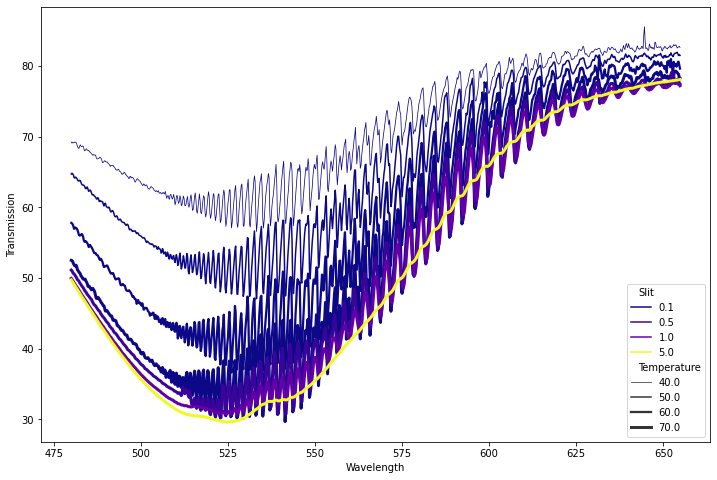

In [35]:
funny = [(i, 0.1) for i in range(40, 71, 10)] + [(70, i) for i in (0.5, 1, 5)]
plt.figure(figsize=(12, 8))
sns.lineplot(
    data = data,
    x = 'Wavelength',
    y = 'Transmission',
    size = 'Temperature',
    hue = 'Slit',
    palette='plasma'
)